In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'students-performance-dataset' dataset.
Path to dataset files: /kaggle/input/students-performance-dataset


In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/sample_data/Student_performance_data _.csv")
print(dataset.columns)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [ ]:
x = dataset.drop(columns=['StudentID','GradeClass', 'GPA'])
#x = dataset[['StudyTimeWeekly','Absences']]
#x = dataset[['StudyTimeWeekly','Absences','ParentalSupport','Tutoring','Extracurricular']]
y = dataset[['GPA']]
print(x.head())
print(y.head())

   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2        19.833723         7   
1   18       0          0                  1        15.408756         0   
2   15       0          2                  3         4.210570        26   
3   17       1          0                  3        10.028829        14   
4   17       1          0                  2         4.672495        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  
0         1                2                0       0      1             0  
1         0                1                0       0      0             0  
2         0                2                0       0      0             0  
3         0                3                1       0      0             0  
4         1                3                0       0      0             0  
        GPA
0  2.929196
1  3.042915
2  0.112602
3  2.054218
4  1.288061


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.03969938818020675
R-squared: 0.954548189425134


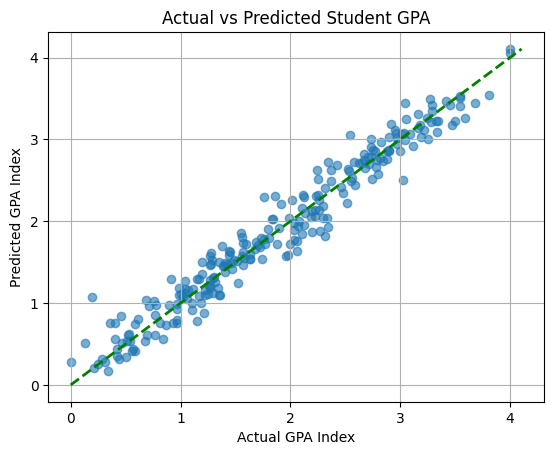

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual GPA Index")
plt.ylabel("Predicted GPA Index")
plt.title("Actual vs Predicted Student GPA")
plt.grid(True)

min_val = min(y_test.min().item(), y_pred.min())
max_val = max(y_test.max().item(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'g--', linewidth=2)

plt.show()

## Observation

>The model performance is influenced by the relevance of the input features rather than their quantity alone.

---
---

### Case 1: Core Academic Behavior

X =
* StudyTimeWeekly  
* Absences  

Test_split = 0.1

- Mean Squared Error: 0.16  
- R-squared: 0.87  

---
### Case 2: Academic + Support Factors

X =
* StudyTimeWeekly  
* Absences  
* ParentalSupport  
* Tutoring
* Extracurricular

Test_split = 0.1

- Mean Squared Error: 0.05  
- R-squared: 0.94  

---
### Case 3: Full Student Profile

X =
* Age
* Gender
* Ethnicity
* ParentalEducation
* StudyTimeWeekly
* Absences Tutoring
* ParentalSupport
* Extracurricular
* Sports
* Music
* Volunteering

Test_split = 0.1

- Mean Squared Error: 0.038  
- R-squared: 0.95  

---
---